<a href="https://colab.research.google.com/github/Lenguist/insight-game-ai/blob/main/simple_sim_united.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title rules
"""
The Simple Simulation

Rules: There is a Seller (Agent) who interacts with a Buyer (environment) trying to sell a car.
The car has intrinsic value to the seller which is modelled with a variable value. Any price higher than value will constitute a profit for the Seller.
The Buyer has some max price they are willing to pay for the car. This value is generated from a uniform random distribution in the range of (range_min, range_max).
This range is known to the Seller. After the Buyer max price is set it will not change over the course of the episode.
The Seller makes repeated offers to the Buyer and the Buyer will either accept the offer (if it is below maximum price) or reject it.
Every time the Seller makes an offer Buyer get more impatient and they are more likely to walk away from the deal entrirely.
This is modelled by the Buyer having some probability to walk (impatience) evaluated at the beginning of each round.
Impatience is incremented each round by a constant amount known to the Seller. The initial impatience is always 0.

The goal of the Seller agent is to maximize average expected return for a random buyer.


Variables:
value - constant across episodes, known to the Agent
range_min, range_max - constant across episodes, known to the Agent
Buyer's max_price - generated uniformly random from range_min, range_max at the beginning of each episode
imp_incr - constant across episodes, known to the Agent
imp_init - assumed to always be 0

Prices are assumed to be discretized as integers.

Future complications to the model are immediately obvious from writing out the variables.
1. buyer max_price can be generated using a different known distribution
2. buyer max_price can be generated using an unknown distribution
3. imp_incr can be be non-constant, or hidden from the Seller
4. imp_init can differ to account for Buyer variability
We will discover which of those complications are informative in the process of experimentation.

After we experiment with those the next step would be to allow Buyer to make bids, limit the supply of vehicles, introduce competition with another Seller,
and make Buyer behaviour incrasingly more complex (bluffs, urgency, etc)

QUESTION: shouldn't the number of cars be constant? aka there is incentive to keep the car if the car supply is limited
"""

"\nThe Simple Simulation\n\nRules: There is a Seller (Agent) who interacts with a Buyer (environment) trying to sell a car.\nThe car has intrinsic value to the seller which is modelled with a variable value. Any price higher than value will constitute a profit for the Seller.\nThe Buyer has some max price they are willing to pay for the car. This value is generated from a uniform random distribution in the range of (range_min, range_max).\nThis range is known to the Seller. After the Buyer max price is set it will not change over the course of the episode.\nThe Seller makes repeated offers to the Buyer and the Buyer will either accept the offer (if it is below maximum price) or reject it.\nEvery time the Seller makes an offer Buyer get more impatient and they are more likely to walk away from the deal entrirely.\nThis is modelled by the Buyer having some probability to walk (impatience) evaluated at the beginning of each round.\nImpatience is incremented each round by a constant amount

In [ ]:
"""
code is structured in the following way. First, we initialize a Simulation with a certain value, range_min, range_max, imp_incr and imp_init.
after that, we initialize an Interaction which constitutes to a single negotiation. That will include a Buyer max_price which will be generated according to simulaiton rules.
"""

'\ncode is structured in the following way. First, we initialize a Simulation with a certain value, range_min, range_max, imp_incr and imp_init.\nafter that, we initialize an Interaction which constitutes to a single negotiation. That will include a Buyer max_price which will be generated according to simulaiton rules.\n'

# Old code (non-markov assumption)

In [ ]:
import random
class Buyer(object):
    def __init__(self, maxprice, imp, imp_incr):
        self.maxprice = maxprice
        self.imp = imp
    def check_offer(self, offer):
      random_number = random.uniform(0, 1)
      if random_number <= buyer.imp:
        return "walk away"
      elif offer <= maxprice:
        return "accept offer"
      else:
        self.imp += imp_incr
        return "reject but continue"

In [ ]:
class Seller(object):
  def __init__(self, value):
    self.value = value
    self.history = []
  def make_offer(self):
    raise NotImplementedError("Subclasses should implement this method.")
  def save_round(self, offer, decision):
    self.history.append({"offer":offer, "decision":decision})

class DescentByOneSeller(Seller):
  def __init__(self, value, init_offer):
    super().__init__(value)  # Call to parent's __init__ method
    self.init_offer = init_offer
  def make_offer(self):
    if len(self.history)==0:
      offer = self.init_offer
    else:
      offer = self.history[-1]["offer"]-1
    return offer


class UserInputSeller(Seller):
 def make_offer(self):
  offer = int(input("You: "))
  return offer

In [ ]:
class Interaction(object):
  def __init__(self, buyer, seller, verbose=True):
    self.buyer = buyer
    self.seller = seller
    self.verbose = verbose # whether to print info

  def negotiation_round(self):
    if self.verbose:
      print(f"The current buyer impatience is {self.buyer.imp}.")
    offer = self.seller.make_offer()
    decision = self.buyer.check_offer(offer)
    self.seller.save_round(offer, decision)
    if self.verbose:
      print(f"Seller made offer of {offer}. The buyer decided to {decision}")
    return decision

  def run_interaction(self):
    decision = ""
    while decision != "walk away" and decision != "accept offer":
      decision = self.negotiation_round()
    if decision == "accept offer":
      final_offer = self.seller.history[-1]["offer"]
      profit = final_offer - self.seller.value
      if self.verbose:
        print(f"Deal made at {final_offer}")
        print(f"Buyer's max_price was {self.buyer.maxprice}")
    else:
      if self.verbose:
        print(f"No deal made - no profit.")
      profit = 0
    return profit

In [ ]:
# simulation
value = 10
range_min = 11
range_max = 15
imp_incr = 0.1
imp_init = 0

rounds = 1000000
i = 0
total_profit = 0
while i < rounds:
  maxprice = int(random.uniform(range_min, range_max+1)) #+1 to include the upper bound
  buyer = Buyer(maxprice, imp_init, imp_incr)
  seller = DescentByOneSeller(value, range_max)

  interaction = Interaction(buyer, seller, verbose=False)
  profit = interaction.run_interaction()
  total_profit += profit
  i+= 1
print(f"Total_profit is ${total_profit} over {rounds} rounds for an average return of ${round(total_profit/rounds,2)}")

Total_profit is $2413741 over 1000000 rounds for an average return of $2.41


In [ ]:
# user interaction
value = 10
range_min = 11
range_max = 15
imp_incr = 0.2
imp_init = 0

rounds = 4
i = 0
total_profit = 0
while i < rounds:
  maxprice = int(random.uniform(range_min, range_max+1)) #+1 to include the upper bound
  buyer = Buyer(maxprice, imp_init, imp_incr)
  seller = UserInputSeller(value)

  interaction = Interaction(buyer, seller, verbose=True)
  profit = interaction.run_interaction()
  total_profit += profit
  i+= 1
print(f"Total_profit is ${total_profit} over {rounds} rounds for an average return of ${round(total_profit/rounds,2)}")

The current buyer impatience is 0.
You: 10
Seller made offer of 10. The buyer decided to accept offer
Deal made at 10
Buyer's max_price was 14
The current buyer impatience is 0.
You: 10
Seller made offer of 10. The buyer decided to accept offer
Deal made at 10
Buyer's max_price was 14
The current buyer impatience is 0.
You: 10
Seller made offer of 10. The buyer decided to accept offer
Deal made at 10
Buyer's max_price was 11
The current buyer impatience is 0.
You: 10
Seller made offer of 10. The buyer decided to accept offer
Deal made at 10
Buyer's max_price was 13
Total_profit is $0 over 4 rounds for an average return of $0.0


# Policy iteration (direct calculation)

In [ ]:
# to get optimal strategy
import math
from itertools import combinations

def all_possible_strategies(range_min, range_max, imp_incr, imp_init):
  strategies = []
  #get max number of moves possible
  max_moves = math.ceil((1-imp_init)/imp_incr + 1)

  # Reverse the input range
  numbers = list(range(range_min, range_max + 1))[::-1]

  # Generate all combinations
  all_combinations = [list(comb) for i in range(1, max_moves + 1) for comb in combinations(numbers, i)]

  # Filter out combinations that don't end with range_min or don't have k numbers
  filtered_combinations = [comb for comb in all_combinations if (comb[-1] == range_min) or len(comb) == max_moves]

  return filtered_combinations

In [ ]:
all_strategies = all_possible_strategies(range_min, range_max, imp_incr, imp_init)
len(all_strategies)

[[11],
 [15, 11],
 [14, 11],
 [13, 11],
 [12, 11],
 [15, 14, 11],
 [15, 13, 11],
 [15, 12, 11],
 [14, 13, 11],
 [14, 12, 11],
 [13, 12, 11],
 [15, 14, 13, 11],
 [15, 14, 12, 11],
 [15, 13, 12, 11],
 [14, 13, 12, 11],
 [15, 14, 13, 12, 11]]

In [ ]:
def calculate_payoff_realprice(strategy, real_price, imp_incr, imp_init, value):
  payoff = 0
  last_imp = 0
  curr_imp = imp_init
  for i in range(len(strategy)):
    bid = strategy[i]
    if bid <= real_price:
      discount_factor = 1
      for j in range(i):
        discount_factor = discount_factor*(1-j*imp_incr)
      payoff += discount_factor*(bid-value)
      break
    if bid > real_price:
      last_imp = curr_imp
      curr_imp = last_imp+imp_incr
  return payoff

def calculate_expected_payoff(strategy, range_min, range_max, imp_incr, imp_init, value):
  expected_payoffs = []
  for real_price in range(range_min, range_max+1):
    expected_payoffs.append(calculate_payoff_realprice(strategy, real_price, imp_incr, imp_init, value))
  expected_payoffs.append(sum(expected_payoffs)/(range_max+1-range_min))
  return expected_payoffs

In [ ]:
import pandas as pd

header = ["R"]
data = [list(range(range_min, range_max+1)) + ["total"]]
for strategy in all_strategies:
  header.append(str(strategy))
  data.append(calculate_expected_payoff(strategy, range_min, range_max, imp_incr, imp_init, value))

# Transpose the data
data = list(map(list, zip(*data)))
# Convert the data to a pandas DataFrame
df = pd.DataFrame(data, columns=header)

In [ ]:
df.iloc[len(df)-1][1:].sort_values()[:15]

[11]                  1.0
[15, 11]              1.8
[12, 11]              1.8
[14, 11]              2.2
[13, 11]              2.2
[15, 14, 11]         2.34
[15, 12, 11]         2.38
[13, 12, 11]         2.38
[15, 13, 11]         2.56
[14, 13, 11]         2.56
[14, 12, 11]         2.58
[15, 14, 13, 11]    2.628
[15, 14, 12, 11]    2.664
[15, 13, 12, 11]    2.704
[14, 13, 12, 11]    2.704
Name: 5, dtype: object

# Simulation code (with Markov assumption)

In [ ]:
"""
Markov assumption states that the past doesn't affect the present - all information relevant to decision making is contained in the "state"
To this end we will modify our original agents to have access to state rather than history
State will encapsulate the current impatience, and the current
"""

'\nMarkov assumption states that the past doesn\'t affect the present - all information relevant to decision making is contained in the "state" \nTo this end we will modify our original agents to have access to state rather than history\n'

In [ ]:
import random
class Buyer(object):
    def __init__(self, maxprice, imp_init, imp_incr):
        self.maxprice = maxprice
        self.imp = imp_init
        self.imp_incr = imp_incr
    def check_offer(self, offer):
      random_number = random.uniform(0, 1)
      if random_number <= self.imp:
        return "walk away"
      elif offer <= self.maxprice:
        return "accept offer"
      else:
        self.imp += self.imp_incr
        return "reject but continue"

In [267]:
class Episode(object):
  def __init__(self, buyer, seller, verbose=True):
    self.buyer = buyer
    self.seller = seller
    self.verbose = verbose # whether to print info

  def negotiation_round(self):
    if self.verbose:
      print(f"Curr state: {self.seller.state}")

    offer = self.seller.make_offer()
    decision = self.buyer.check_offer(offer)
    new_state = {"last-offer":offer, "imp":self.buyer.imp}
    self.seller.state = new_state

    if self.verbose:
      print(f"Seller made offer of {offer}. The buyer decided to {decision}")
    return decision

  def run_episode(self):
    decision = ""
    while decision != "walk away" and decision != "accept offer":
      decision = self.negotiation_round()

    if decision == "accept offer":
      final_offer = self.seller.state["last-offer"]
      profit = final_offer - self.seller.value
      if self.verbose:
        print(f"Deal made at {final_offer}")
        print(f"Buyer's max_price was {self.buyer.maxprice}")

    else:
      if self.verbose:
        print(f"No deal made - no profit.")
        print(f"Buyer's max_price was {self.buyer.maxprice}")
      profit = 0
    # reset seller state
    self.seller.reset_state()
    return profit

In [507]:
def simulation(value, range_min, range_max, imp_incr, imp_init, rounds, seller, verbose=False):
  total_profit = 0
  round_cnt = 0
  for i in range(rounds):
    maxprice = int(random.uniform(range_min, range_max+1))
    buyer = Buyer(maxprice, imp_init, imp_incr)
    episode = Episode(buyer, seller, verbose=verbose)
    profit = episode.run_episode()
    total_profit += profit
  average_return = total_profit/rounds
  return average_return

In [435]:
class Seller(object):
  def __init__(self, value, imp_init, init_offer):
    self.value = value
    self.imp_init = imp_init
    self.init_offer = init_offer
    self.state = {"last-offer": self.init_offer, "imp":self.imp_init} # initial state
  def make_offer(self):
    raise NotImplementedError("Subclasses should implement this method.")
  def reset_state(self):
    self.state = {"last-offer":self.init_offer, "imp":self.imp_init}

class RandomSeller(Seller):
  def make_offer(self):
    offer = int(random.uniform(value+1, self.state["last-offer"])) # return random offer
    return offer

class DescentByOneSeller(Seller):
  def make_offer(self):
    offer = self.state["last-offer"]-1
    return offer

class UserInputSeller(Seller):
 def make_offer(self):
  offer = int(input("You: "))
  return offer

In [512]:
class DescentArithmeticSeller(Seller):
  def __init__(self, value, imp_init, init_offer, init_descent):
    super().__init__(value, imp_init, init_offer)
    self.init_descent = init_descent
    self.descent = init_descent
  def make_offer(self):
    offer = self.state["last-offer"]-max(self.descent,1)
    self.descent = self.descent-1
    return offer
  def reset_state(self):
    super().reset_state()
    self.descent = self.init_descent

In [513]:
class DescentByNSeller(Seller):
  def __init__(self, value, imp_init, init_offer, descent):
    super().__init__(value, imp_init, init_offer)
    self.descent = descent
  def make_offer(self):
    offer = self.state["last-offer"]-self.descent
    return offer

In [528]:
imp_list = [i / 10.0 for i in range(11)]
all_results = []

# params that are needed to initialize seller
value = 10
range_min = 11
range_max = 50
rounds = 10000
n = 1
sim_results = []
seller = DescentByNSeller(value=value, imp_init=0, init_offer=range_max, descent=n)
for imp_incr in imp_list:
  result = simulation(value,
                        range_min,
                        range_max,
                        imp_incr = imp_incr,
                        imp_init = 0,
                        rounds = rounds,
                        seller=seller)
  sim_results.append(result)

all_results.append(sim_results)

In [529]:
random_results = []
seller = RandomSeller(value=value, imp_init=0, init_offer=range_max)
for imp_incr in imp_list:
  result = simulation(value,
                        range_min,
                        range_max,
                        imp_incr = imp_incr,
                        imp_init = 0,
                        rounds = rounds,
                        seller=seller)
  random_results.append(result)

In [539]:
arithmetic_results = []
n = 20
seller = DescentArithmeticSeller(value=value, imp_init=0, init_offer=range_max, init_descent = n)
for imp_incr in imp_list:
  result = simulation(value,
                        range_min,
                        range_max,
                        imp_incr = imp_incr,
                        imp_init = 0,
                        rounds = rounds,
                        seller=seller)
  arithmetic_results.append(result)

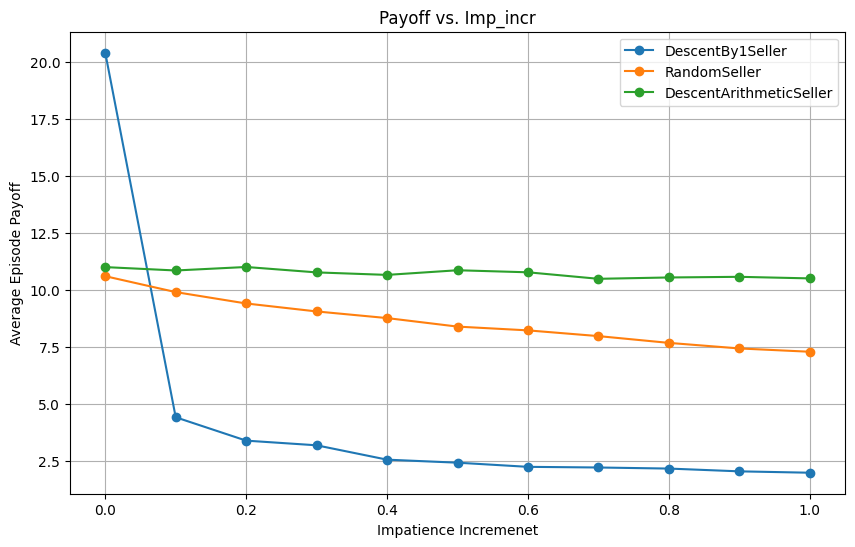

In [540]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for i in range(len(all_results)):
  plt.plot(imp_list, all_results[i], marker='o', label=f'DescentBy{i+1}Seller')
plt.plot(imp_list, random_results, marker='o', label=f'RandomSeller')
plt.plot(imp_list, arithmetic_results, marker='o', label=f'DescentArithmeticSeller')
plt.title('Payoff vs. Imp_incr')
plt.xlabel('Impatience Incremenet')
plt.ylabel('Average Episode Payoff')
plt.grid()

plt.legend()  # This will create a legend using the labels specified in the plot functions

plt.show()

In [441]:
imp_list = [i / 10.0 for i in range(11)]
all_results = []

# params that are needed to initialize seller
value = 10
range_min = 11
range_max = 30

for n in range(2):
  sim_results = []
  seller = DescentByNSeller(value=value, imp_init=0, init_offer=range_max, descent=n)

  for imp_incr in imp_list:
    result = simulation(value,
                        range_min,
                        range_max,
                        imp_incr = imp_incr,
                        imp_init = 0,
                        rounds = 1,
                        seller=seller)
    sim_results.append(result)

  all_results.append(sim_results)

KeyboardInterrupt: ignored

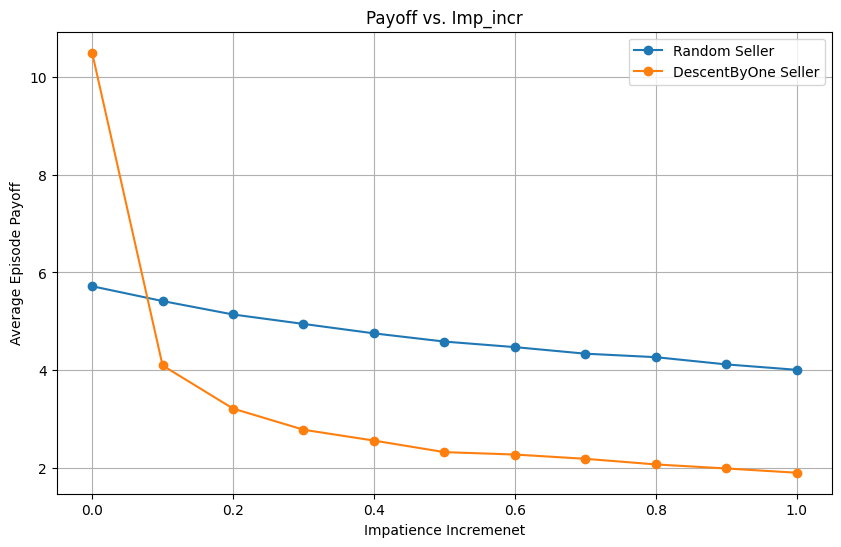

In [389]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(imp_list, random_sim_results, marker='o', label='Random Seller')
plt.plot(imp_list, byone_sim_results, marker='o', label='DescentByOne Seller')
plt.title('Payoff vs. Imp_incr')
plt.xlabel('Impatience Incremenet')
plt.ylabel('Average Episode Payoff')
plt.grid()

plt.legend()  # This will create a legend using the labels specified in the plot functions

plt.show()


In [ ]:
"""
compute and reach nash equilibrium quickly
design specific neural network structure for our specific problem
q learning, deep q learning
"""

In [403]:
 # simulation
value = 10
range_min = 11
range_max = 30
imp_incr = 0.1
imp_init = 0
init_offer = range_max

maxprice = int(random.uniform(range_min, range_max+1)) #+1 to include the upper bound
buyer = Buyer(maxprice, imp_init, imp_incr)


print("RandomSeller episode")
seller = RandomSeller(value, imp_init, init_offer)
episode = Episode(buyer, seller, verbose=True)
profit = episode.run_episode()

print("\n")
print("DescentByOneSeller episode")
seller = DescentByOneSeller(value, imp_init, init_offer)
episode = Episode(buyer, seller, verbose=True)
profit = episode.run_episode()


RandomSeller episode
Curr state: {'last-offer': 30, 'imp': 0}
Seller made offer of 13. The buyer decided to accept offer
Deal made at 13
Buyer's max_price was 25


DescentByOneSeller episode
Curr state: {'last-offer': 30, 'imp': 0}
Seller made offer of 29. The buyer decided to reject but continue
Curr state: {'last-offer': 29, 'imp': 0.1}
Seller made offer of 28. The buyer decided to reject but continue
Curr state: {'last-offer': 28, 'imp': 0.2}
Seller made offer of 27. The buyer decided to reject but continue
Curr state: {'last-offer': 27, 'imp': 0.30000000000000004}
Seller made offer of 26. The buyer decided to reject but continue
Curr state: {'last-offer': 26, 'imp': 0.4}
Seller made offer of 25. The buyer decided to accept offer
Deal made at 25
Buyer's max_price was 25


In [ ]:
# simulation
value = 10
range_min = 11
range_max = 15
imp_incr = 0.1
imp_init = 0
init_offer = 16

maxprice = int(random.uniform(range_min, range_max+1)) #+1 to include the upper bound
buyer = Buyer(maxprice, imp_init, imp_incr)
seller = RandomSeller(value, imp_init, init_offer)

episode = Episode(buyer, seller, verbose=True)
profit = episode.run_episode()
print(profit)

In [ ]:
# simulation
value = 10
range_min = 11
range_max = 15
imp_incr = 0.1
imp_init = 0

maxprice = int(random.uniform(range_min, range_max+1)) #+1 to include the upper bound
buyer = Buyer(maxprice, imp_init, imp_incr)
seller = RandomSeller(value, range_max)

  interaction = Interaction(buyer, seller, verbose=False)
  profit = interaction.run_interaction()
  total_profit += profit

rounds = 1000000
i = 0
total_profit = 0
while i < rounds:
  maxprice = int(random.uniform(range_min, range_max+1)) #+1 to include the upper bound
  buyer = Buyer(maxprice, imp_init, imp_incr)
  seller = RandomSeller(value, range_max)

  interaction = Interaction(buyer, seller, verbose=False)
  profit = interaction.run_interaction()
  total_profit += profit
  i+= 1
print(f"Total_profit is ${total_profit} over {rounds} rounds for an average return of ${round(total_profit/rounds,2)}")

In [ ]:
import numpy as np

# initialize parameters
alpha = 0.5
gamma = 1
epsilon = 0.1
num_episodes = 100

actions = [11,12,13,14,15]
# specify the number of states and actions
num_states = 16 # 0 is initial (None, 0) everything else is up to 1 prob for each price
num_actions = 5  # 11, 12 ,13, 14, 15
# initialize Q-table with zeros
Q = np.zeros((num_states, num_actions))

In [ ]:
# simulation
value = 10
range_min = 11
range_max = 15
imp_incr = 0.5
imp_init = 0

In [ ]:
possible_actions = list(range(range_min, range_max+1))
possible_actions

possible_impatience = [0,0.5,1]

possible_states = [(None, 0)]
for offer in possible_actions:
  for impatience in possible_impatience:
    possible_states.append((offer, impatience))



Q_table = []
for state in possible_states:
  row_id = str(state)
  row = {row_id:[]}
  for action in possible_actions:
    col_id = str(action)
    row[row_id].append({col_id:0})
  Q_table.append(row)

In [ ]:
Q_table

[{'(None, 0)': [{'11': 0}, {'12': 0}, {'13': 0}, {'14': 0}, {'15': 0}]},
 {'(11, 0)': [{'11': 0}, {'12': 0}, {'13': 0}, {'14': 0}, {'15': 0}]},
 {'(11, 0.5)': [{'11': 0}, {'12': 0}, {'13': 0}, {'14': 0}, {'15': 0}]},
 {'(11, 1)': [{'11': 0}, {'12': 0}, {'13': 0}, {'14': 0}, {'15': 0}]},
 {'(12, 0)': [{'11': 0}, {'12': 0}, {'13': 0}, {'14': 0}, {'15': 0}]},
 {'(12, 0.5)': [{'11': 0}, {'12': 0}, {'13': 0}, {'14': 0}, {'15': 0}]},
 {'(12, 1)': [{'11': 0}, {'12': 0}, {'13': 0}, {'14': 0}, {'15': 0}]},
 {'(13, 0)': [{'11': 0}, {'12': 0}, {'13': 0}, {'14': 0}, {'15': 0}]},
 {'(13, 0.5)': [{'11': 0}, {'12': 0}, {'13': 0}, {'14': 0}, {'15': 0}]},
 {'(13, 1)': [{'11': 0}, {'12': 0}, {'13': 0}, {'14': 0}, {'15': 0}]},
 {'(14, 0)': [{'11': 0}, {'12': 0}, {'13': 0}, {'14': 0}, {'15': 0}]},
 {'(14, 0.5)': [{'11': 0}, {'12': 0}, {'13': 0}, {'14': 0}, {'15': 0}]},
 {'(14, 1)': [{'11': 0}, {'12': 0}, {'13': 0}, {'14': 0}, {'15': 0}]},
 {'(15, 0)': [{'11': 0}, {'12': 0}, {'13': 0}, {'14': 0}, {'15': 0}

In [ ]:
class QLearningSeller(Seller):
  def __init__(self, value, Q_table, epsilon, alpha):
    super().__init__(value)  # Call to parent's __init__ method
    self.Q_table = Q_table
    self.epsilon = epsilon
    self.alpha = alpha
  def make_offer(self):
    curr_state = #HOW OD I GET THE CURRENT STATE HERE
    # explore
    if np.random.random()<self.epsilon:
      offer =
    # exploit

    return offer

In [ ]:
np.random.random()

0.23918557423431552

In [ ]:


rounds = 1000000
i = 0
while i < rounds:
  maxprice = int(random.uniform(range_min, range_max+1)) #+1 to include the upper bound
  buyer = Buyer(maxprice, imp_init, imp_incr)
  seller = DescentByOneSeller(value, range_max)

  interaction = Interaction(buyer, seller, verbose=False)
  profit = interaction.run_interaction()
  total_profit += profit
  i+= 1
print(f"Total_profit is ${total_profit} over {rounds} rounds for an average return of ${round(total_profit/rounds,2)}")

TypeError: ignored

In [ ]:
import numpy as np

# initialize parameters
alpha = 0.5
gamma = 0.9
epsilon = 0.1
num_episodes = 50000

# specify the number of states and actions
num_states = ...  # fill this with your number of states
num_actions = ...  # fill this with your number of actions

# initialize Q-table with zeros
Q = np.zeros((num_states, num_actions))

# main loop over episodes
for i_episode in range(num_episodes):

    # initialize state (this will depend on your specific problem)
    state = ...  # fill this with your initial state

    for t in range(100):  # limit each episode to a maximum length of 100 steps

        # choose action using epsilon-greedy policy
        if np.random.rand() < epsilon:
            action = np.random.choice(num_actions)  # random action
        else:
            action = np.argmax(Q[state])  # greedy action

        # take action and get reward and new state
        new_state, reward, done = ...  # fill this with your environment's response

        # update Q-value
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[new_state]) - Q[state, action])

        # move to new state
        state = new_state

        # end episode if done
        if done:
            break

# after all episodes, print the resulting Q-table
print(Q)
